In [1]:
import pandas as pd
import numpy as np

In [2]:
fake = pd.read_csv(r'Fake.csv')
true = pd.read_csv(r'True.csv')

In [3]:
fake.shape

(23481, 4)

In [4]:
true.shape

(21417, 4)

In [5]:
# Adding flag to track true and fake news 
fake['target'] = 'fake'
true['target'] = 'true'

In [6]:
# Combining fake and true news datasets
df = pd.concat([fake,true])
df.shape

(44898, 5)

In [7]:
df.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [8]:
# Data shuffling
from sklearn.utils import shuffle

In [9]:
df = shuffle(df)

In [10]:
df.shape

(44898, 5)

In [11]:
df

,title,text,subject,date,target
22984,Hollywood Hip to Al Qaeda: ‘And the Oscar for ...,Alex Christoforou The DuranIt should come as ...,Middle-east,"February 28, 2017",fake
17732,LOL! ANTI-TRUMP ACTORS George Clooney and Matt...,"In fly-over country, and pretty much anywhere ...",left-news,"Oct 29, 2017",fake
9861,Apple refused China request for source code in...,WASHINGTON (Reuters) - Apple Inc (AAPL.O) has ...,politicsNews,"April 19, 2016",true
3852,"After Loss, Democratic Senate Candidate Write...",Let s get something straight here Americans ...,News,"November 10, 2016",fake
14261,ANDREW BREITBART: “I Don’t Care Who Our Candid...,There are two paths one is America and the ot...,politics,"Mar 18, 2016",fake
...,...,...,...,...,...
6802,Trump says to stop visa abuses that undermine ...,"BATON ROUGE, La (Reuters) - U.S. President-ele...",politicsNews,"December 9, 2016",true
11985,Palestinians to call for emergency meeting of ...,"RAMALLAH, West Bank (Reuters) - The Palestinia...",worldnews,"December 18, 2017",true
16978,It’s Bad Enough Canadian Magazine Puts A Smili...,So who does Canada believe is the actual victi...,Government News,"Nov 7, 2015",fake
6986,President Obama Reveals What Clinton’s Privat...,Hate to disappoint the naysayers of Hillary Cl...,News,"April 10, 2016",fake


## Data Cleaning

In [12]:
# Removing Date column
df.drop(['date'],axis=1,inplace=True)

In [13]:
df.shape

(44898, 4)

In [14]:
# Removing title column
df.drop(['title'],axis=1,inplace=True)

In [15]:
df

,text,subject,target
22984,Alex Christoforou The DuranIt should come as ...,Middle-east,fake
17732,"In fly-over country, and pretty much anywhere ...",left-news,fake
9861,WASHINGTON (Reuters) - Apple Inc (AAPL.O) has ...,politicsNews,true
3852,Let s get something straight here Americans ...,News,fake
14261,There are two paths one is America and the ot...,politics,fake
...,...,...,...
6802,"BATON ROUGE, La (Reuters) - U.S. President-ele...",politicsNews,true
11985,"RAMALLAH, West Bank (Reuters) - The Palestinia...",worldnews,true
16978,So who does Canada believe is the actual victi...,Government News,fake
6986,Hate to disappoint the naysayers of Hillary Cl...,News,fake


In [16]:
import nltk

In [17]:
# Converting text to lower case
df['text'] = df['text'].apply(lambda x: x.lower())
df['text']

22984     alex christoforou the duranit should come as ...
17732    in fly-over country, and pretty much anywhere ...
9861     washington (reuters) - apple inc (aapl.o) has ...
3852     let s get something straight here   americans ...
14261     there are two paths one is america and the ot...
                               ...                        
6802     baton rouge, la (reuters) - u.s. president-ele...
11985    ramallah, west bank (reuters) - the palestinia...
16978    so who does canada believe is the actual victi...
6986     hate to disappoint the naysayers of hillary cl...
7768     megyn kelly became the only fox news host to t...
Name: text, Length: 44898, dtype: object

In [18]:
# Removing Punctuation and stopwords
import string 

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

df['text'] = df['text'].apply(punctuation_removal)

In [19]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aakash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
df['text']

22984    alex christoforou duranit come surprise film c...
17732    flyover country pretty much anywhere east west...
9861     washington reuters apple inc aaplo asked chine...
3852     let get something straight americans elect don...
14261    two paths one america one occupy black lives m...
                               ...                        
6802     baton rouge la reuters us presidentelect donal...
11985    ramallah west bank reuters palestinian foreign...
16978    canada believe actual victim herehave seen cov...
6986     hate disappoint naysayers hillary clinton woul...
7768     megyn kelly became fox news host take donald t...
Name: text, Length: 44898, dtype: object

## EDA

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


<AxesSubplot:xlabel='subject'>

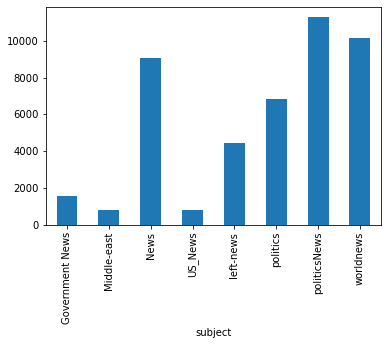

In [21]:
# Number of articles per subject
print(df.groupby(['subject'])['text'].count())
df.groupby(['subject'])['text'].count().plot(kind='bar')

([<matplotlib.patches.Wedge at 0x193e7d639a0>,
 [Text(-0.07936302786338077, 1.0971333145102997, 'fake'),
  Text(0.07936313058441406, -1.0971333070797922, 'true')],
 [Text(-0.043288924289116786, 0.5984363533692544, '52.30'),
  Text(0.0432889803187713, -0.5984363493162502, '47.70')])

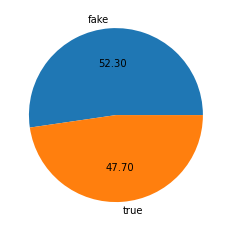

In [22]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels =['fake','true'], autopct = '%0.2f')

In [23]:
!pip install wordcloud

In [24]:
from wordcloud import WordCloud
wc = WordCloud(width = 500,height = 500,min_font_size=10,background_color='Black')

In [25]:
fake_wc = wc.generate(df[df['target']=='fake']['text'].str.cat(sep=" "))

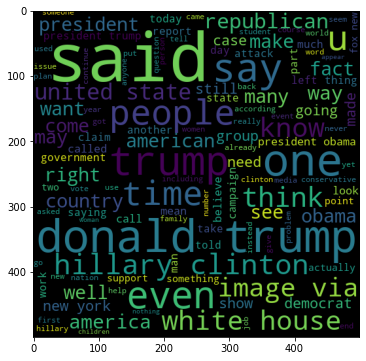

In [26]:
plt.figure(figsize=(12,6))
plt.imshow(fake_wc)

In [27]:
true_wc = wc.generate(df[df['target']=='true']['text'].str.cat(sep=" "))

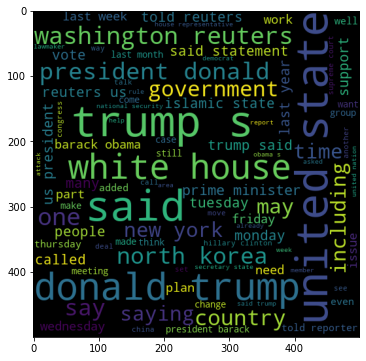

In [28]:
plt.figure(figsize=(12,6))
plt.imshow(true_wc)

In [29]:
import seaborn as sns

In [30]:
df['NumOfCharacters'] = df['text'].apply(len)

In [31]:
# Number of words

df['NumOfWords'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [32]:
# Number of sentences

df['NumOfSentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

<AxesSubplot:xlabel='NumOfCharacters', ylabel='Count'>

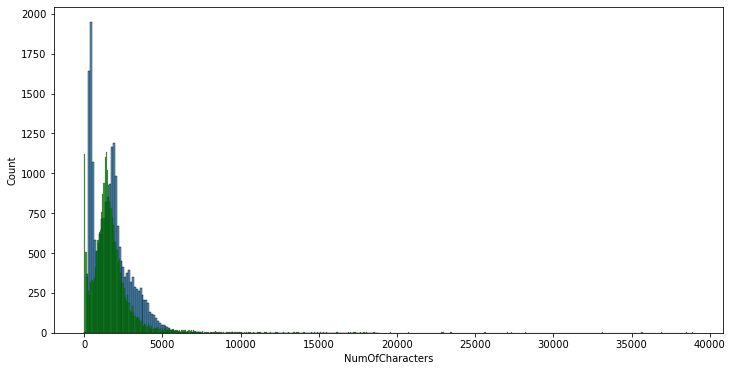

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']=='true']['NumOfCharacters'])
sns.histplot(df[df['target']=='fake']['NumOfCharacters'],color='green')

<AxesSubplot:xlabel='NumOfWords', ylabel='Count'>

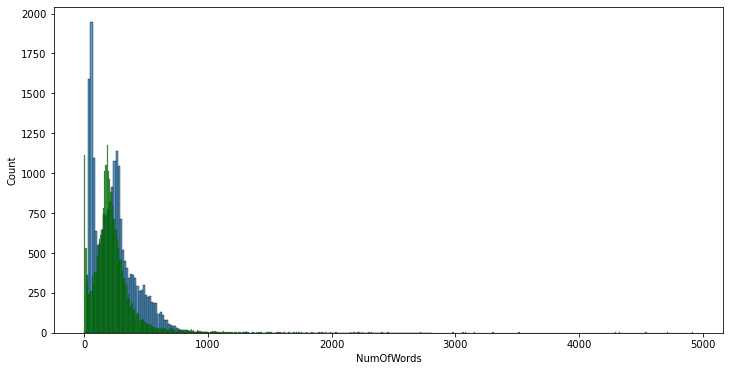

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']=='true']['NumOfWords'])
sns.histplot(df[df['target']=='fake']['NumOfWords'],color='green')

<AxesSubplot:xlabel='NumOfSentences', ylabel='Count'>

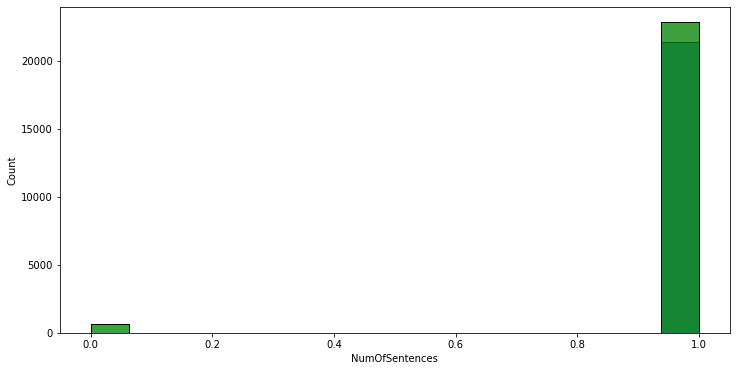

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']=='true']['NumOfSentences'])
sns.histplot(df[df['target']=='fake']['NumOfSentences'],color='green')

In [36]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [37]:
df['target'] = LE.fit_transform(df['target'])

<AxesSubplot:>

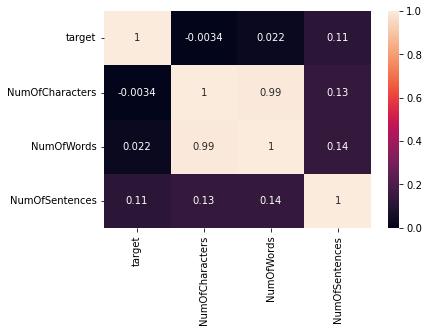

In [38]:
sns.heatmap(df.corr(),annot=True)

## Model Building

In [39]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [40]:
X = tfidf.fit_transform(df['text']).toarray()

In [41]:
X.shape

(44898, 3000)

In [42]:
y = df['target'].values

In [43]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [46]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [47]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [48]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9511135857461025
[[4447  261]
 [ 178 4094]]
0.940068886337543


In [49]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9447661469933185
[[4429  279]
 [ 217 4055]]
0.9356252884171666


In [50]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9732739420935412
[[4547  161]
 [  79 4193]]
0.9630225080385852


In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [52]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
bnb = BernoulliNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [53]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': bnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
}

In [54]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [55]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9922048997772829
Precision -  0.9897435897435898
For  KN
Accuracy -  0.7143652561247216
Precision -  0.9202363367799113
For  NB
Accuracy -  0.9732739420935412
Precision -  0.9630225080385852
For  DT
Accuracy -  0.99543429844098
Precision -  0.9916337438996049
For  LR
Accuracy -  0.9947661469933184
Precision -  0.9929988331388565
For  RF
Accuracy -  0.9978841870824053
Precision -  0.9971942950666355
For  AdaBoost
Accuracy -  0.9956570155902005
Precision -  0.9939323220536757
For  BgC
Accuracy -  0.9967706013363029
Precision -  0.9969547903490279
For  ETC
Accuracy -  0.9935412026726058
Precision -  0.99
For  GBDT
Accuracy -  0.9953229398663697
Precision -  0.9918604651162791


In [56]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
5,RF,0.997884,0.997194
7,BgC,0.996771,0.996955
6,AdaBoost,0.995657,0.993932
4,LR,0.994766,0.992999
9,GBDT,0.995323,0.991860
3,DT,0.995434,0.991634
8,ETC,0.993541,0.990000
0,SVC,0.992205,0.989744
2,NB,0.973274,0.963023
1,KN,0.714365,0.920236


In [58]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(rfc,open('model.pkl','wb'))